16.11.2020

# Laplace filter in frequency domain

## Tutorial 2, Exercise 1


Your task in this exercise is to create your own implementation of a
Laplace filter in Fourier space and apply it to an image.
The formula for the Laplacian in the Fourier domain is:


$$
    L(u,v) = -4 \cdot \pi^2 \cdot (u^2+v^2)
$$


Source: (Gonzalez, chapter 4, p286)

**Task:** You need to replace the `???` in the code with the required commands

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Configure behavior of pyplot for nicer visualization.

In [2]:
%matplotlib notebook
#plt.rcParams["image.cmap"] = "gray"
#plt.rcParams["image.interpolation"] = None

Load venice.jpg image using imread and normalize it to (0, 1)


In [6]:
img1 = plt.imread("venice.jpg")
img1.shape

(424, 640, 3)

In [11]:
img1[0][1][1]

128

In [3]:
img = plt.imread("venice.jpg").mean(-1)
img = img/img.max()

In [5]:
img.shape

(424, 640)

In [6]:
img2 = plt.imread('venice.jpg')


In [7]:
img2.shape

(424, 640, 3)

Plot the image before applying the filter

<IPython.core.display.Javascript object>


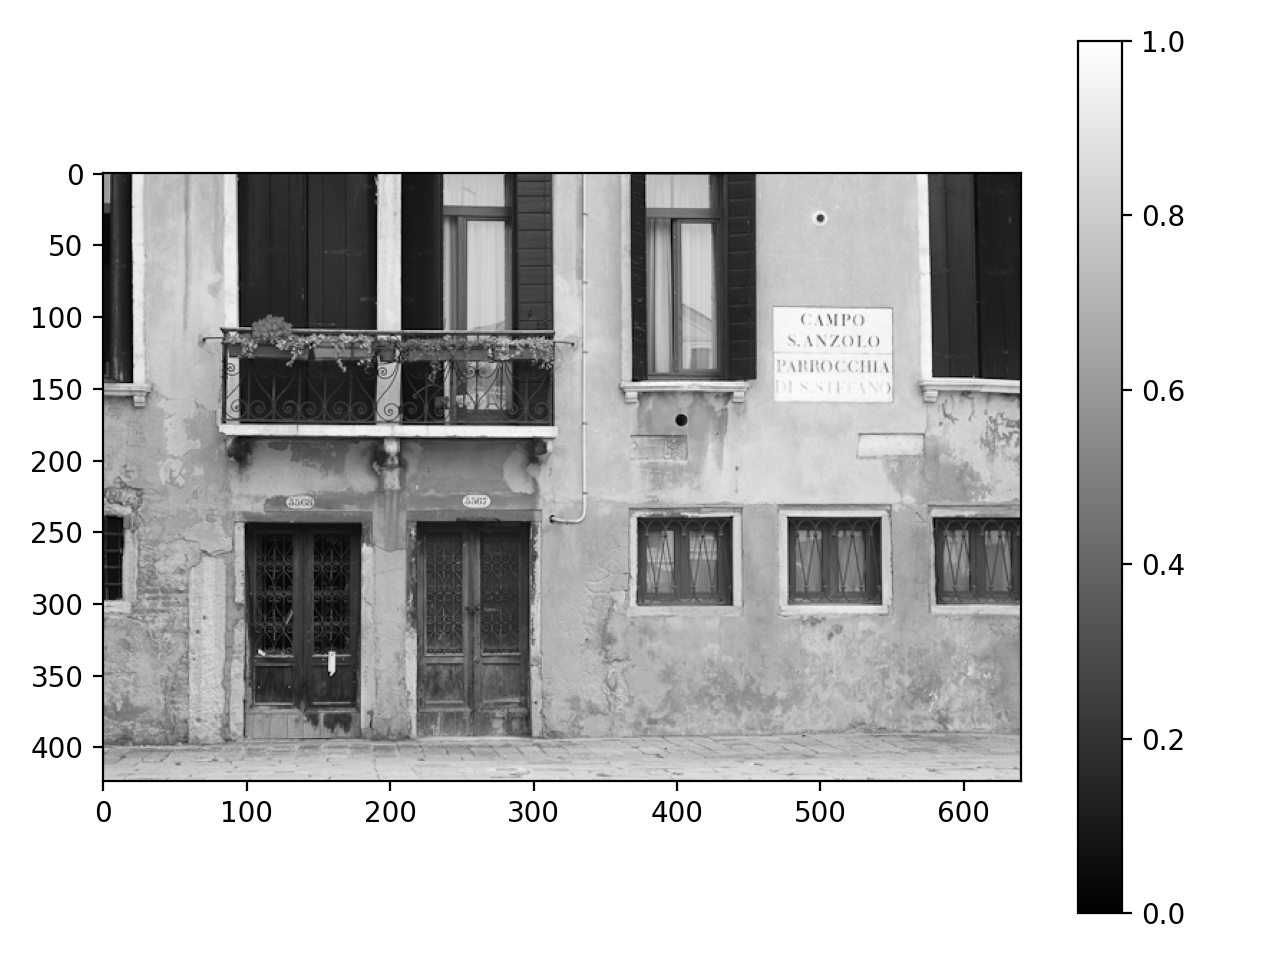

In [8]:
plt.figure()
plt.imshow(img, cmap = 'gray')
plt.colorbar()
plt.tight_layout()


<IPython.core.display.Javascript object>


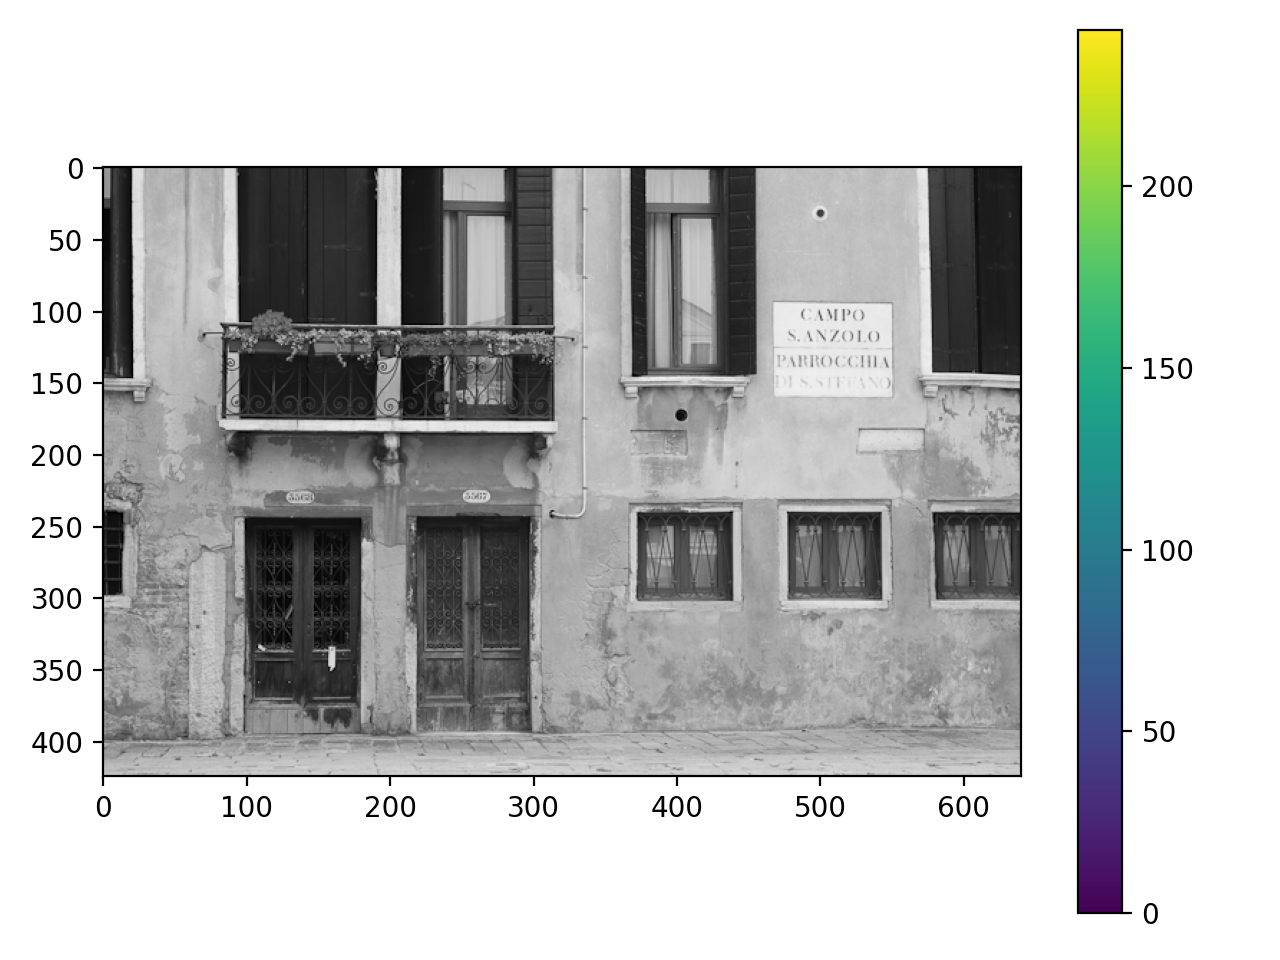

In [9]:
plt.figure()
plt.imshow(img2)
plt.colorbar()
plt.tight_layout()


Generate a coordinate system with the discrete Fourier transform sample
frequencies `u` and `v`. You can use the numpy function linspace to do it
manually or `np.fft.fftfreq`. Look up the documentation to get familiar with the
parameters of these functions.

In [10]:
np.fft.fftfreq?

In [11]:
img.shape

(424, 640)

In [19]:
v = np.fft.fftfreq(img.shape[0]) #frequencies from vertical direction
u = np.fft.fftfreq(img.shape[1]) #frequencies on horizontal direction
len(v)

424

The function `np.meshgrid` creates coordinate arrays for the v and the u
coordinates and writes them into vv and uu
you can display them with `plt.figure(); plt.imshow(uu); colorbar()` if you
want to have a look at them

In [22]:
np.meshgrid?


<IPython.core.display.Javascript object>


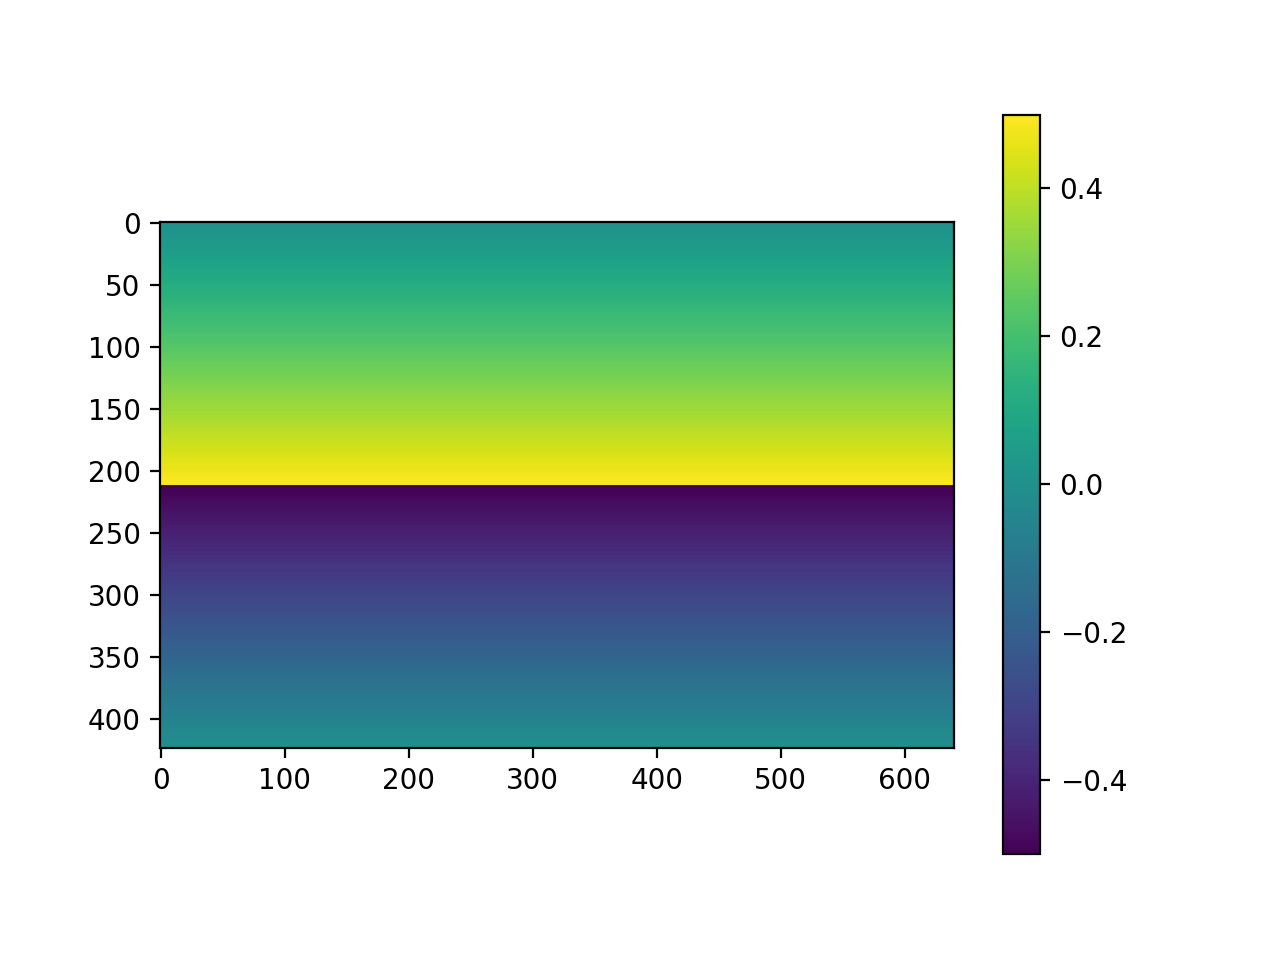

<IPython.core.display.Javascript object>


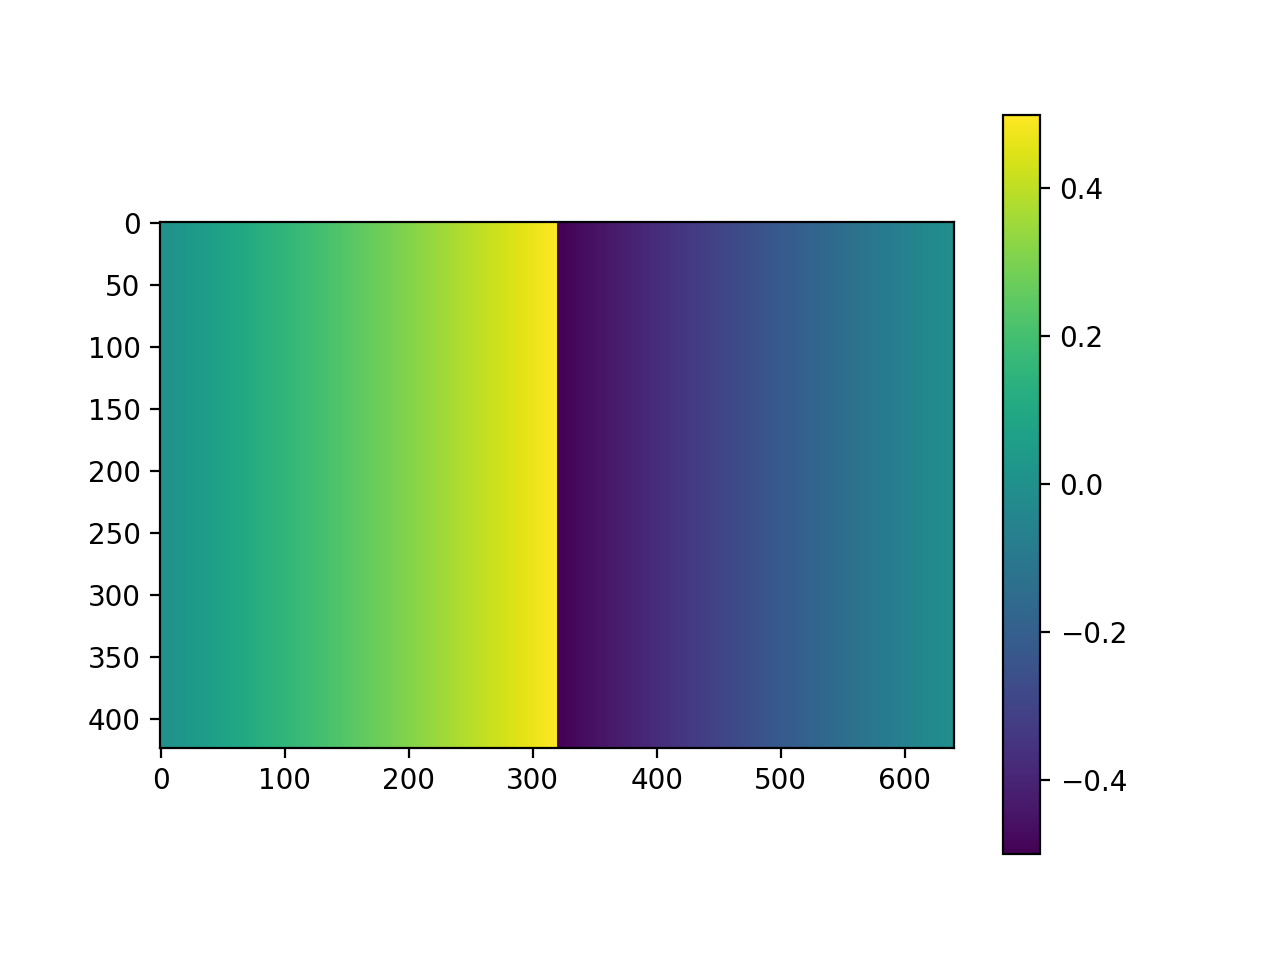

(424, 640)

In [21]:
vv, uu = np.meshgrid(v, u, indexing='ij')

plt.figure()
plt.imshow(vv)
plt.colorbar()


plt.figure()
plt.imshow(uu)
plt.colorbar()

vv.shape


Calculate the filter function $L(v, u)$.
If you want to do this in one line use vv and uu, as they are both of the
image shape. The formula is given in the very top documentation of this
script. Check if `L` has the same shape as the image.

<IPython.core.display.Javascript object>


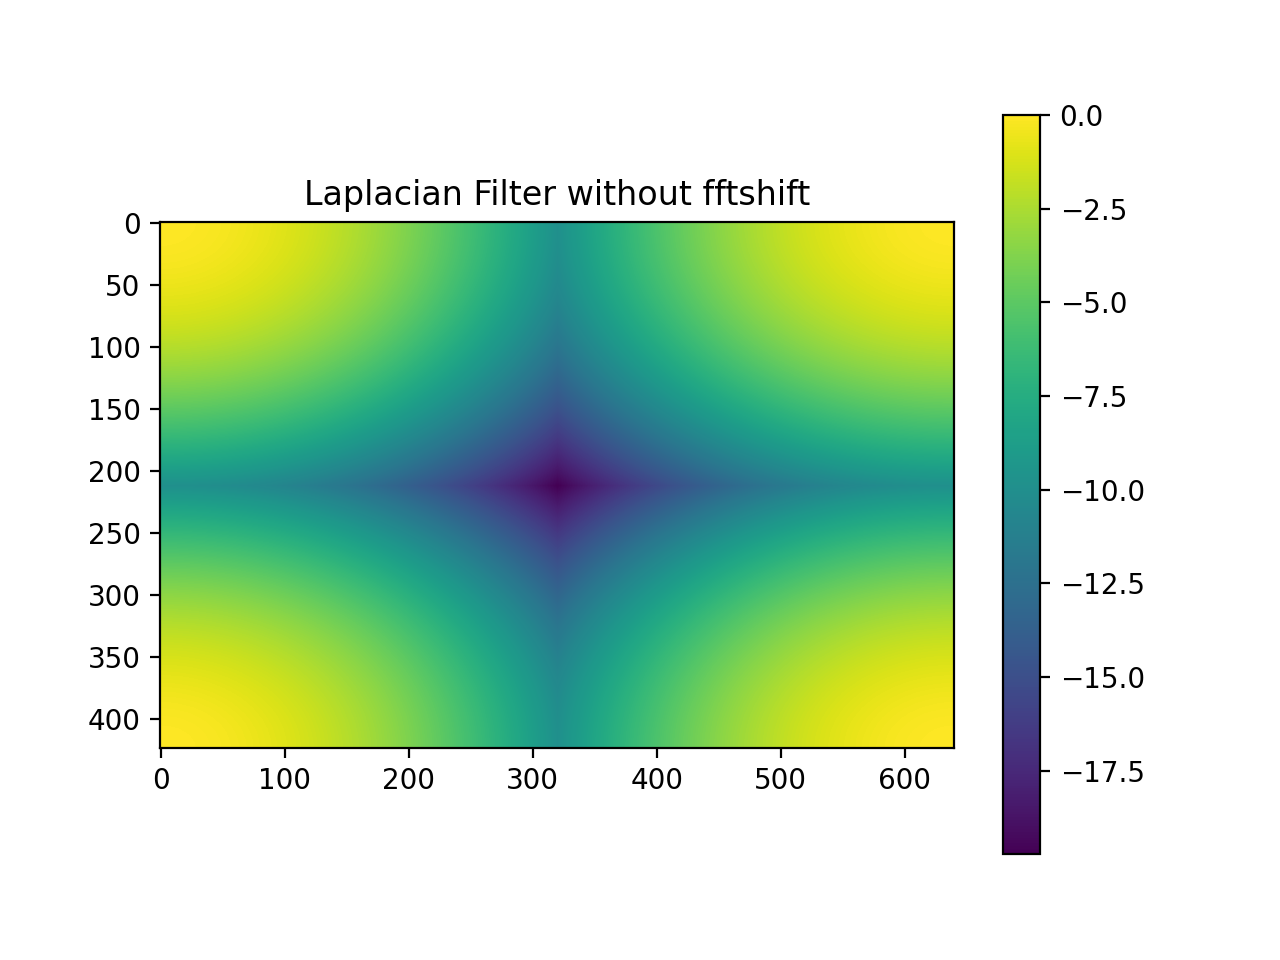

In [14]:
L = -4*np.pi**2 * (uu**2 + vv**2) #Filter in Fourier domain


plt.figure()
plt.title('Laplacian Filter without fftshift')
plt.imshow((L)) 
plt.colorbar()

<IPython.core.display.Javascript object>


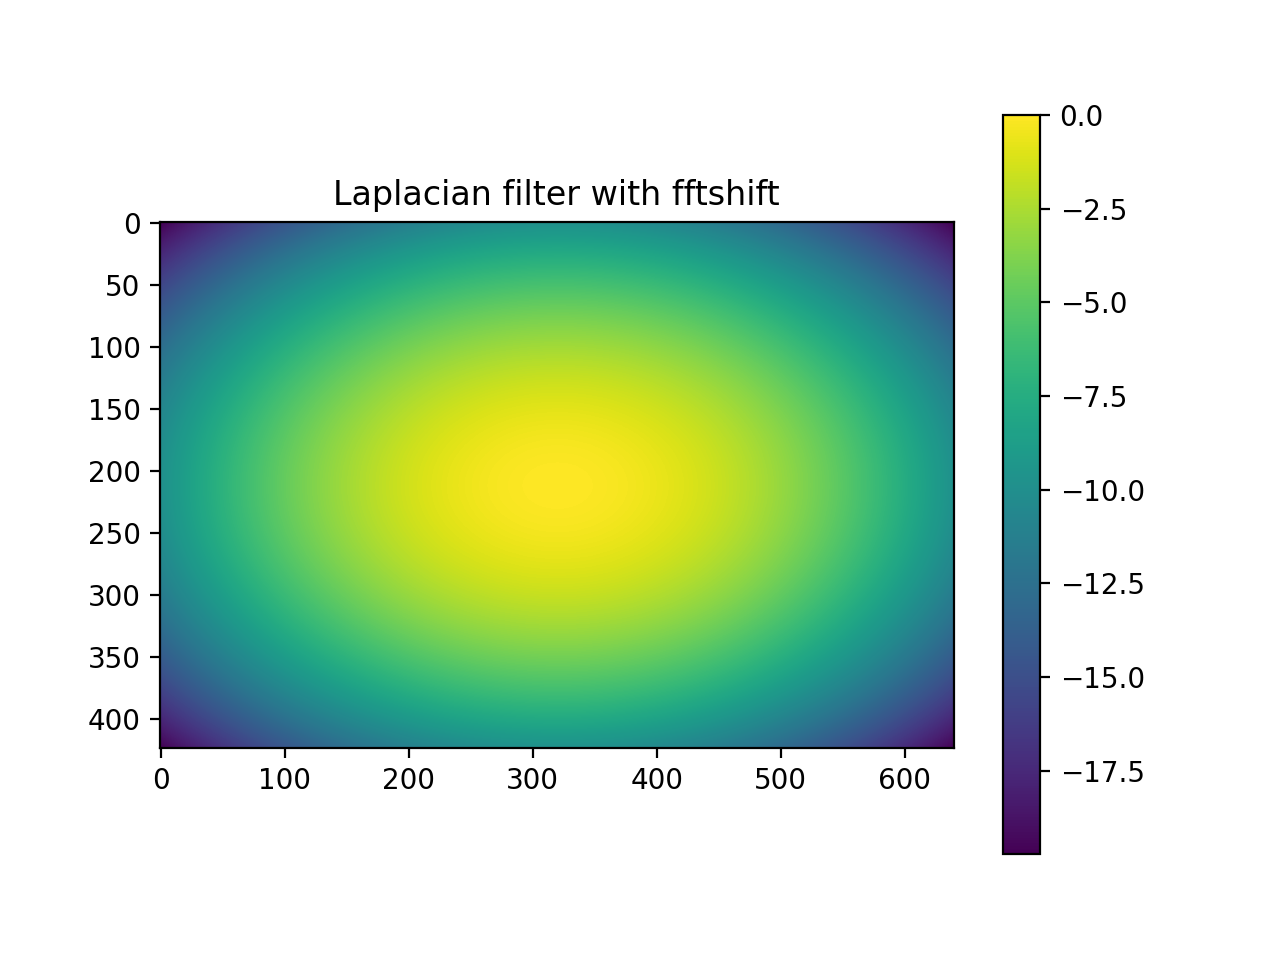

In [15]:
L = -4*np.pi**2 * (uu**2 + vv**2)

#HIGH PASS FILTER. Low frequencies are weighted with 0 
plt.figure()
plt.title('Laplacian filter with fftshift')
plt.imshow(np.fft.fftshift(L)) #shift the zero frequency component to the center of the spectrum
plt.colorbar()

## Laplacian filter

A high pass filter is the basis for most sharpening methods. An image is sharpened when contrast is enhanced between adjoining areas with little variation in brightness or darkness. **A high pass filter tends to retain the high frequency information within an image while reducing the low frequency information**. The kernel of the high pass filter is designed to *increase the brightness of the center pixel* relative to neighboring pixels. The kernel array usually contains a single positive value at its center, which is completely surrounded by negative values. *A Laplacian filter forms another basis for edge detection methods*. A Laplacian filter can be used to compute the second derivatives of an image, which measure the rate at which the first derivatives change. This helps to determine if a change in adjacent pixel values is an edge or a continuous progression. Kernels of Laplacian filters usually contain negative values in a cross pattern (similar to a plus sign), which is centered within the array. 

Calculate the Fourier transform of the image
You can use the numpy function `fft2` included in  [np.fft](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)

(424, 640)


<IPython.core.display.Javascript object>


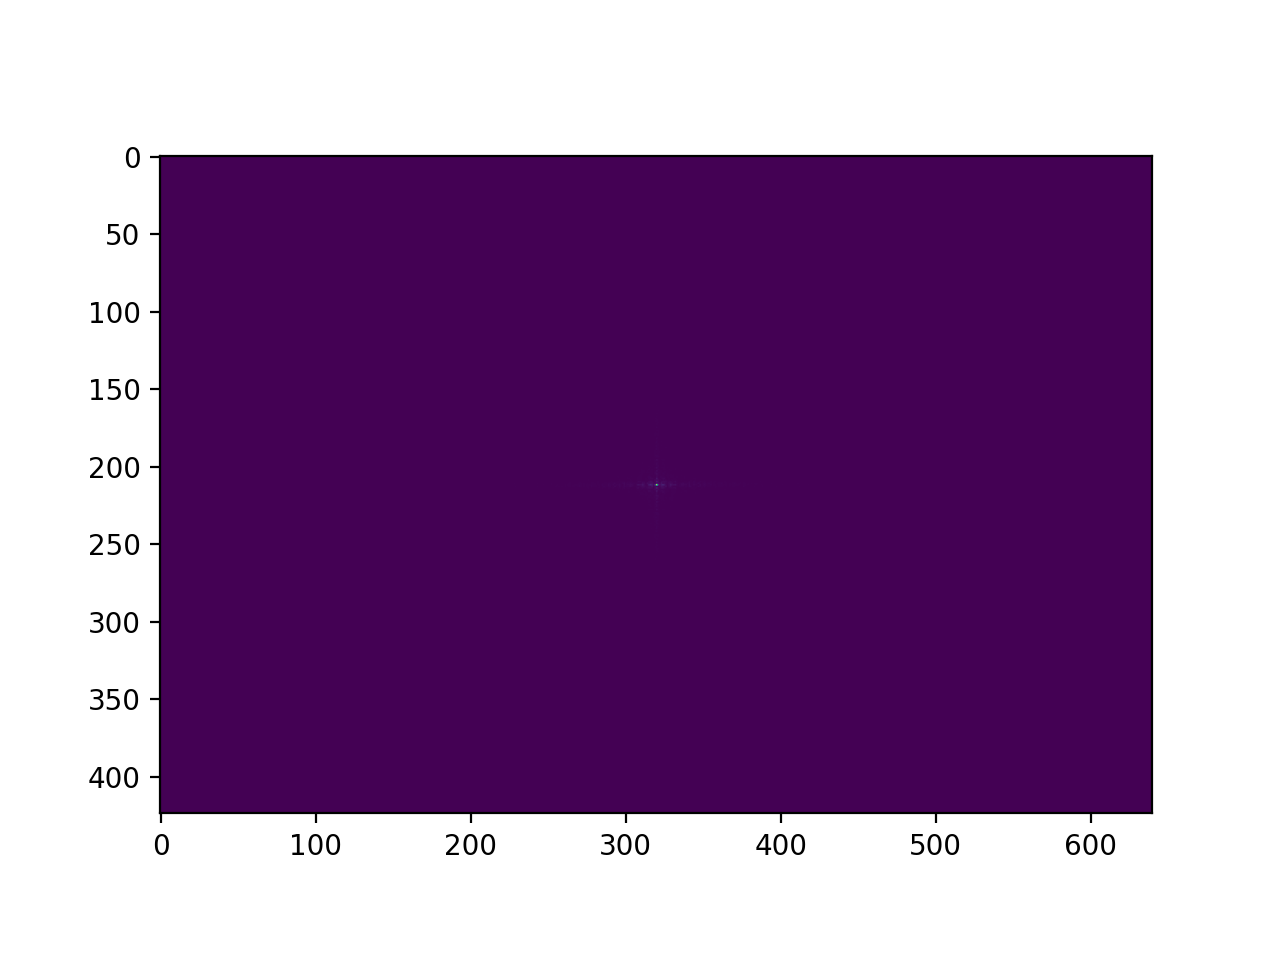

<IPython.core.display.Javascript object>


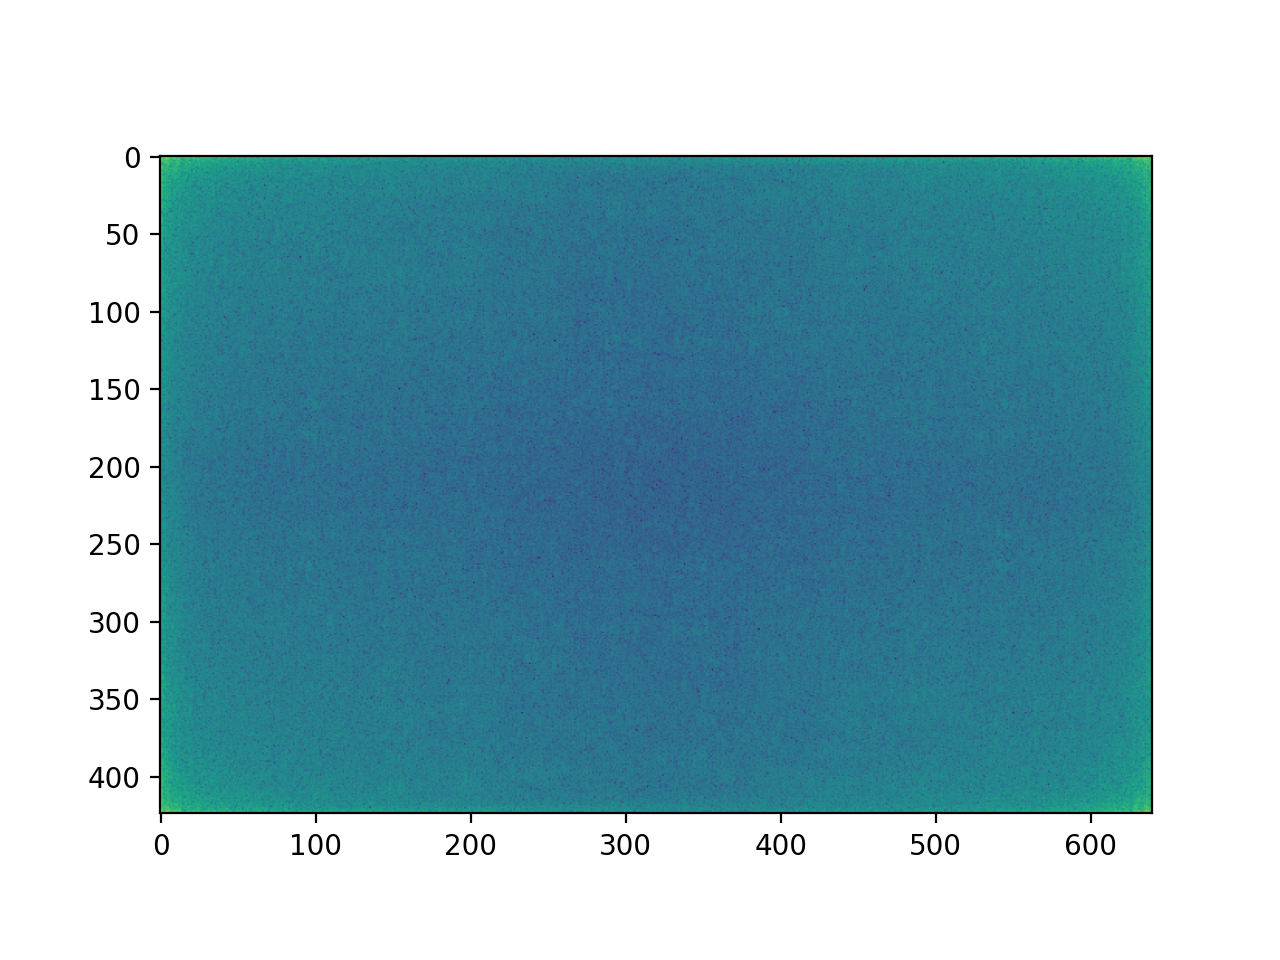

In [24]:
img_ft = np.fft.fft2(img)#Fourier transform of image
print(img_ft.shape)

plt.figure()
#plt.imshow(np.fft.fftshift(np.log(np.abs(img_ft))))
plt.imshow(np.fft.fftshift(np.abs(img_ft)))
plt.figure()
plt.imshow(np.log(np.abs(img_ft)))

Multiply the Fourier transform of the image by the filter function.
Take care (if neccessary) to center the potential function $L$ around the top
left corner of the image, because Fourier transforms in Python always have
the "central" frequencies $(0, 0)$ in the top left corner. Therefore, play with the
function np.fft.fftshift (and ifftshift) to see what it does. Check out the looks of
the shifted and unshifted potential function $L$.

Take the inverse Fourier transform of the product to get the filtered image
and select the real part of it, as we do not want to have the imaginary part of real images.

<IPython.core.display.Javascript object>


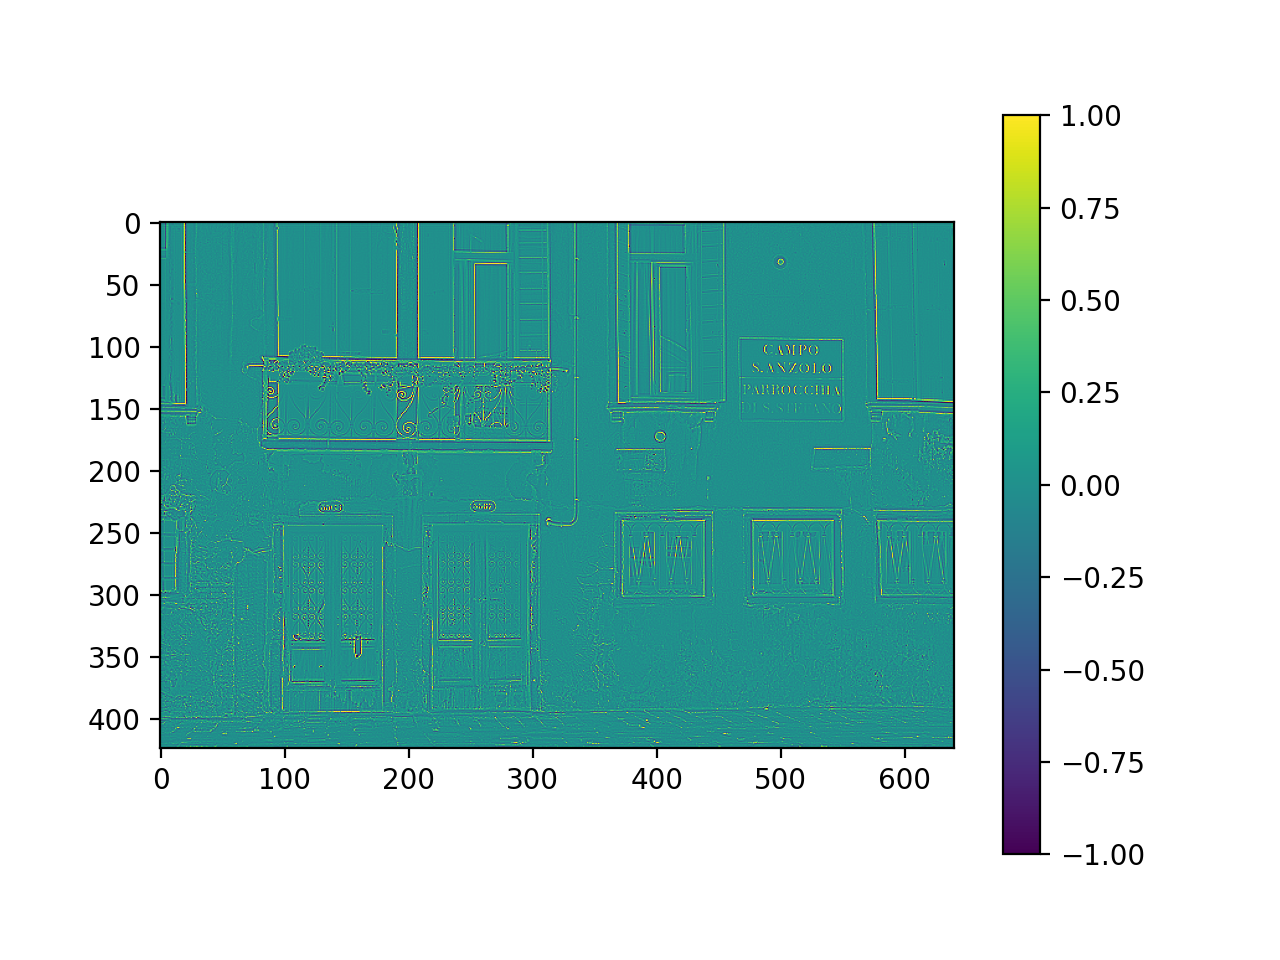

In [17]:
img_filtered = np.fft.ifft2(img_ft * L).real

plt.figure()
plt.imshow(img_filtered, vmin=-1.0, vmax=1.0)
plt.colorbar()